# Regressão linear simples

Em posse de dados de imóveis (tamanho e preço) vou tentar, a partir de uma correlação entre o tamanho do imóvel e seu preço, fazer uma regressão linear para futuramente estimar preços a partir de tamanhos.

## Importando as bibliotecas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm #para rodar regressões

/home/naiara/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:53: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


## Carregando os dados

In [4]:
data = pd.read_csv("real_estate_price_size.csv")
data

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46
...,...,...
95,252460.400,549.80
96,310522.592,1037.44
97,383635.568,1504.75
98,225145.248,648.29


In [25]:
data.describe() #método do pandas que apresenta estatística descritiva

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


## Regressão

### Declarando as variáveis dependentes e independentes

Meu objetivo é encontrar relação entre tamanho -> preço
Logo, minha variável dependente é o 'preço', já que ela depende da minha variável 'tamanho'
(Imagino que quanto maior o tamanho, maior o preço, certo? Isso significa uma relação positiva)

A equação da reta seria y = b0 + b1.x1

In [26]:
y = data['size']
x1 =data['price']

### Explorando os dados

Minha ideia aqui é ver graficamente se existe alguma relação linear entre meus dados 

<function matplotlib.pyplot.show(*args, **kw)>

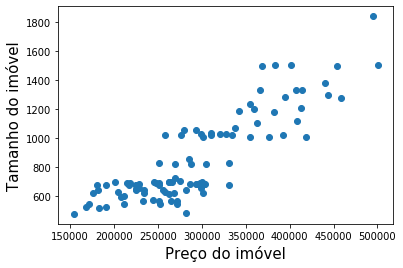

In [12]:
plt.scatter(x1,y)
plt.xlabel('Preço do imóvel',fontsize=15)
plt.ylabel('Tamanho do imóvel',fontsize=15)
plt.show

Bom, é possível ver uma relação forte, positiva (quanto maior, maior) e linear entre meus dados de preço x tamanho

### Regressão

1. Criar uma nova variável, que tem valor constante igual a 1, para acompanhar a constante b0 na equação: ŷ = b0.x0 + b1.x1 (ainda não entendi isso muito bem)
2. Fazer a regressão em si, a relação entre y (preço) e x (tamanho), com o método OLS
3. Apresentar os resultados em tabela

In [20]:
x = sm.add_constant(x1) 
results = sm.OLS(y,x).fit()
results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   size   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Fri, 06 Mar 2020   Prob (F-statistic):           8.13e-31
Time:                        11:04:17   Log-Likelihood:                -642.81
No. Observations:                 100   AIC:                             1290.
Df Residuals:                      98   BIC:                             1295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -122.3349     59.633     -2.051      0.043    -240.675      -3.994
price          0.0033      0.000     16.909      0.000       0.003       0.004
==============================================================================
Omnibus:                        0.832   Durbin-Watson:                   2.143
Prob(Omnibus):                  0.660   Jarque-Bera (JB):                0.941
Skew:                           0.153   Prob(JB):                        0.625
Kurtosis:                       2.636   Cond. No.                     1.19e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

RESULTADOS: Modelo OLS = Ordinary Least Squares: método para calculo da reta |
Método: Least Squares |
R² ajustado = 0.742, 74,2% da regressão encontrada explica adequadamente a variabilidade dos dados |
Coeficientes:
* Const (b0) = -122.3349
* Price (b1) = 0.0033

### Plot the regression line on the initial scatter

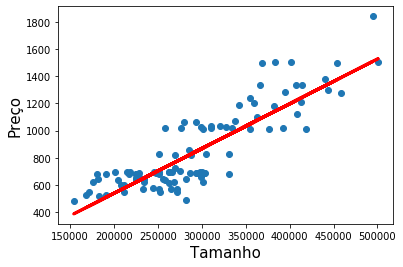

In [27]:
plt.scatter(x1,y)
yhat = -122.3349 + 0.0033*x1
# ŷ = b0.x0 + b1.x1 
# price: 0.0033
# const: -122.3349
fig = plt.plot(x1,yhat, lw=3, c='red', label='regressão')
plt.xlabel('Tamanho', fontsize=15)
plt.ylabel('Preço', fontsize=15)
plt.show()

Conclusão: existe uma alta correlação entre o tamanho e o preço dos imóveis. Essa relação pode ser explicada pela reta ŷ = -122.3349 + 0.0033*x1, em que x1 representa o tamanho do imóvel e ŷ o preço estimado. Em posse de outros tamanhos de imóveis, conseguimos prever o possível preço do imóvel.